In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data=pd.read_csv('marvel.csv') #getting graph data

In [ ]:
G = nx.from_pandas_edgelist(data, source='source', target='target',edge_attr=True, create_using=nx.DiGraph) #generate data to Graph structure

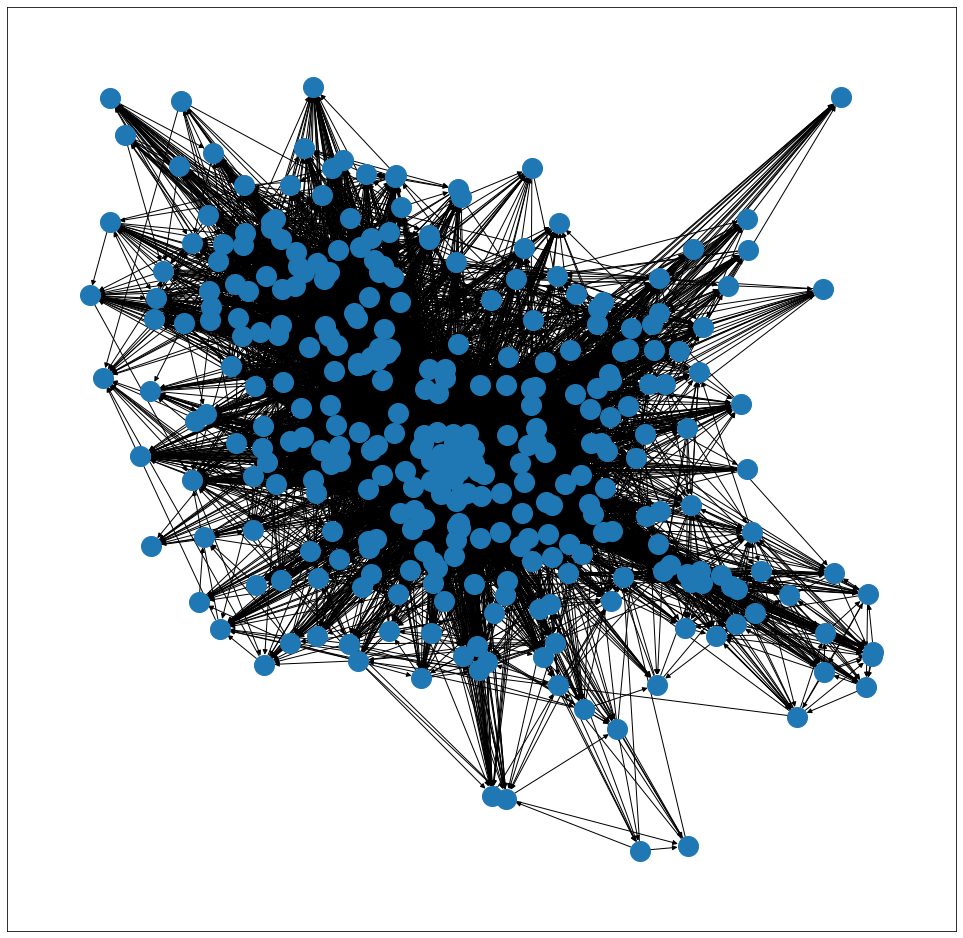

In [ ]:
fig = plt.figure(figsize=(17, 17)) #sizing plots
layout = nx.spring_layout(G)

nx.draw_networkx(G, layout,with_labels=False, node_size=400)
# plt.savefig('Graph.png')

In [ ]:
''' Getting metrics values for each node '''
btw = nx.betweenness_centrality(G, weight='weight')
cls = nx.closeness_centrality(G, distance='weight')
deg = nx.degree_centrality(G)
'''
setting node attributes regarding to certain metrics
nx.set_node_attributes() --> {node : attribute}
'''
nx.set_node_attributes(G, deg, "degree_centrality")
nx.set_node_attributes(G, btw, "betweenness_centrality")
nx.set_node_attributes(G, cls, "closeness_centrality")

In [ ]:
def drawG(G):
  '''
  Input : G (Graph)

  Output : plot of nx.draw functions
  '''
  titles = [ 'Betweennes Centrality', 'Closeness Centrality', 'Degree Centrality'  ]
  
  '''Color range for each atribute to plot colorbar '''
  colors_list  = [] 

  colors_list.append( list( nx.betweenness_centrality(G, weight='weight').values() ) )
  colors_list.append( list( nx.closeness_centrality(G, distance='weight').values() ) )
  colors_list.append( list( nx.degree_centrality(G).values() ) )
  layout = nx.spring_layout(G)

  for i in range(3): #drawing Graph for each attribute
    fig = plt.figure(figsize=(15, 10))
    fig.suptitle( titles[i] )
    edge_dr = nx.draw_networkx_edges(G, layout, alpha = 0.1)
    node_dr = nx.draw_networkx_nodes(G, layout, node_size=100,node_color= colors_list[i],cmap=plt.cm.jet_r)
    fig.colorbar(node_dr)

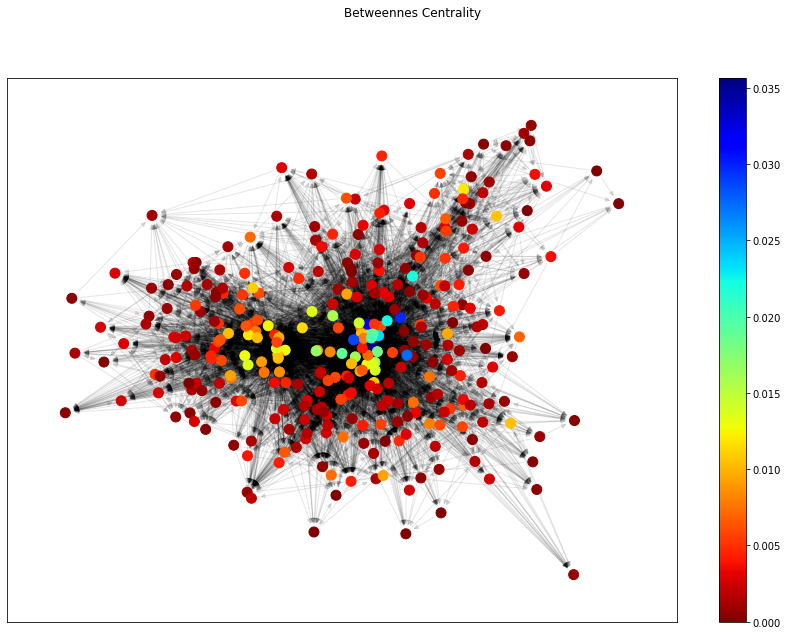

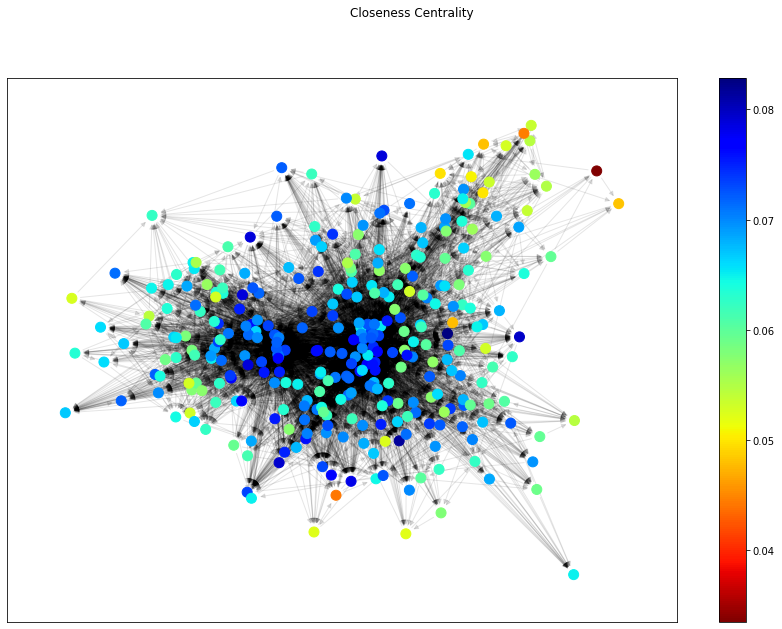

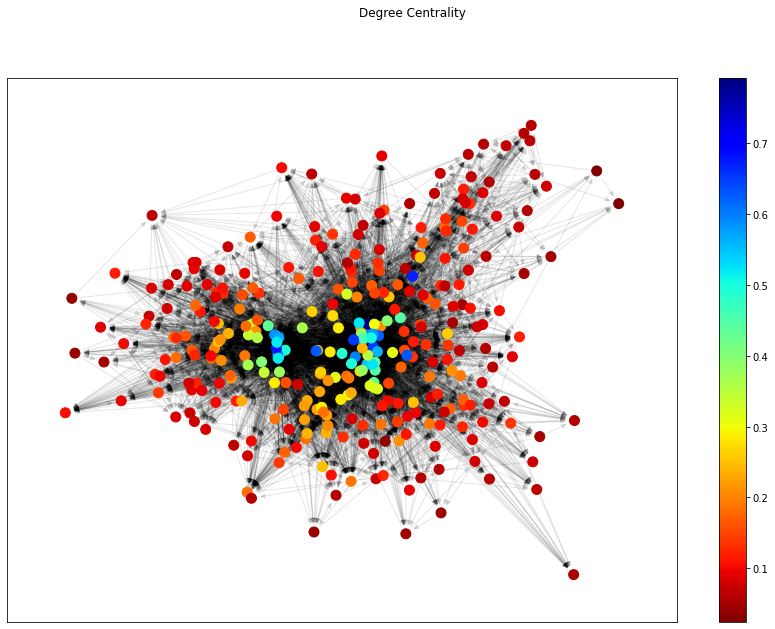

In [ ]:
drawG(G)

In [ ]:
def attribute_total(G, attribute):  #to get sum of attribute values  
    att_r = nx.get_node_attributes(G, attribute) # get attribute values
    sum = 0 # calculate sum
    for i in att_r:
        sum += att_r[i]  
    return sum   

In [ ]:
def  G_info(G):
'''
Input : G (Graph)

Output : Metric info's
'''

  try:
    print(f"Network diameter                 : {nx.diameter(G)}")
  except:
    G_new_copy=G.copy()
    print(f"Network diameter                 : {nx.diameter(G_new_copy .to_undirected())}")
  print(f"Network density                  : {nx.density(G)}")
  print(f"Network avr_shortest_p length    : {nx.average_shortest_path_length(G)}")
  print(f"Betweenness Centrality           : {attribute_total(G, 'betweenness_centrality')}") 
  print(f"Degree Centrality                : {attribute_total(G, 'degree_centrality')}") 
  print(f"Closeness Centrality             : {attribute_total(G, 'closeness_centrality')}")            

In [ ]:
G_info(G)

Network diameter                 : 4
Network density                  : 0.09278437552766365
Network avr_shortest_p length    : 2.123177801542185
Betweenness Centrality           : 1.5553263639511865
Degree Centrality                : 60.680981595092014
Closeness Centrality             : 21.6638841116962


In [ ]:
def higher_than_average(G, attribute):
  '''
  Input   : G (Graph)
            attribute ( Node attribute)

  Output  : G (Graph) with new values depending on average of attribute values        
  '''

  att = nx.get_node_attributes(G, attribute)
  # print(att)
  att_avr = attribute_total(G,attribute)/len(att)
  # print(att_avr)
  sorted_att_values = sorted(att.values())
  sorted_att_nodes = sorted(att)
  # print(sorted_att)

  for i in range(len(att)):  #get values that higher than mean
    if  sorted_att_values[i] > att_avr:
      G.remove_nodes_from(sorted_att_nodes[:i]) #selec
      print(f"{i} values that lower than mean is removed")
      return G




## Betweeness centrality



In [ ]:
G_temp = G.copy() #copying graph to not confuse values with original Graph
G_new_bet  = higher_than_average(G_temp, 'betweenness_centrality')
# len( G_new_bet.nodes() )

219 values that lower than mean is removed


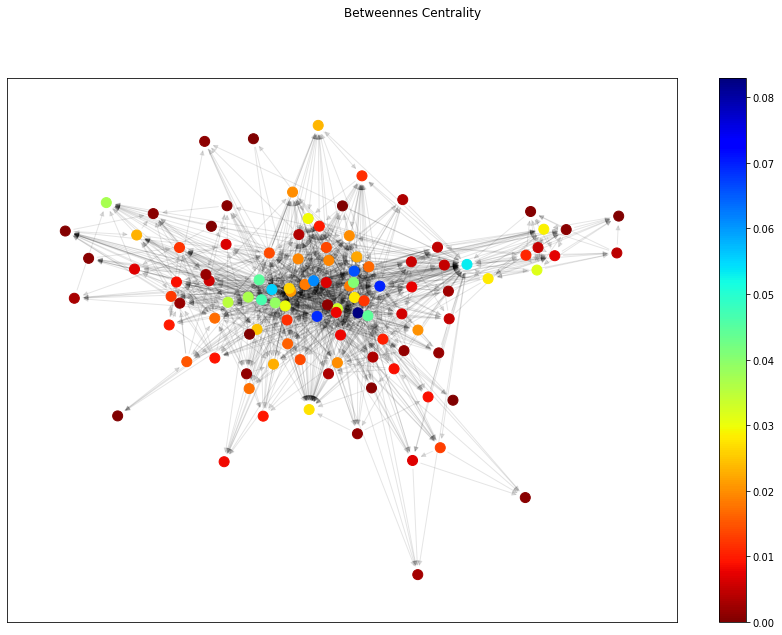

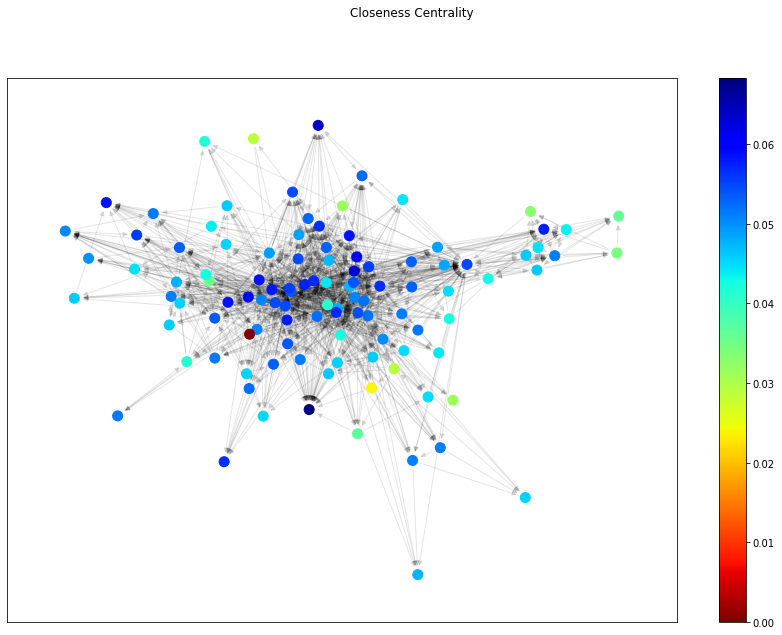

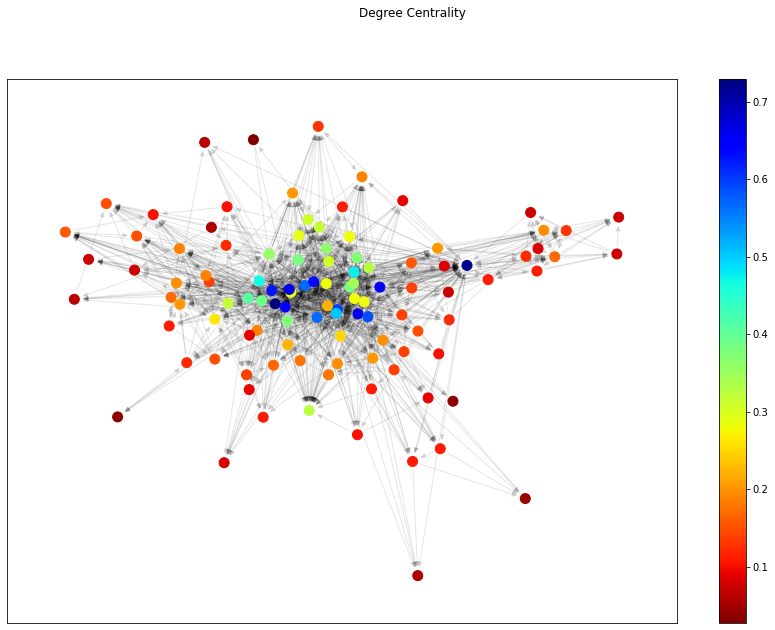

In [ ]:
drawG(G_new_bet)

In [ ]:
G_info(G_new_bet)

Network diameter                 : 3
Network density                  : 0.11838006230529595
Network avr_shortest_p length    : 2.1953963309103495
Betweenness Centrality           : 0.5415159273111136
Degree Centrality                : 22.717791411042946
Closeness Centrality             : 7.152810901406879


## Closeness Centrality

In [ ]:
G_temp = G.copy()
G_new_clos  = higher_than_average(G_temp, 'closeness_centrality')
# print( len( G_new_clos.nodes() ) )

150 values that lower than mean is removed


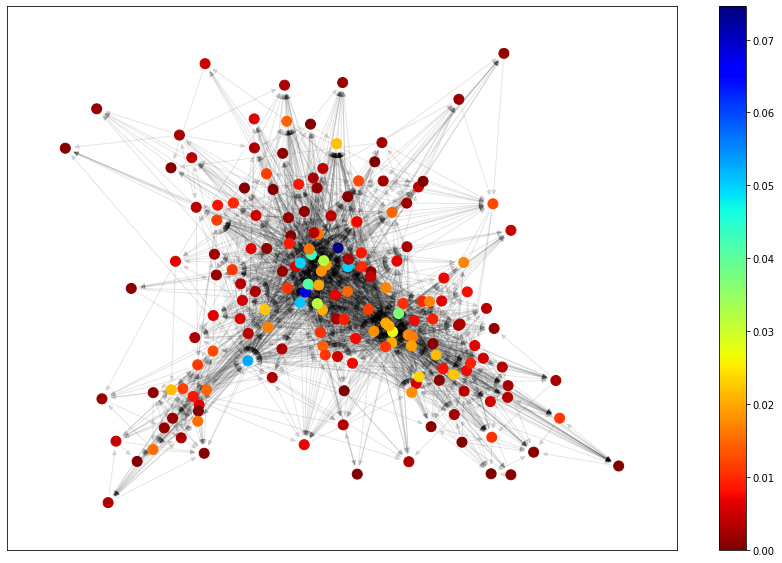

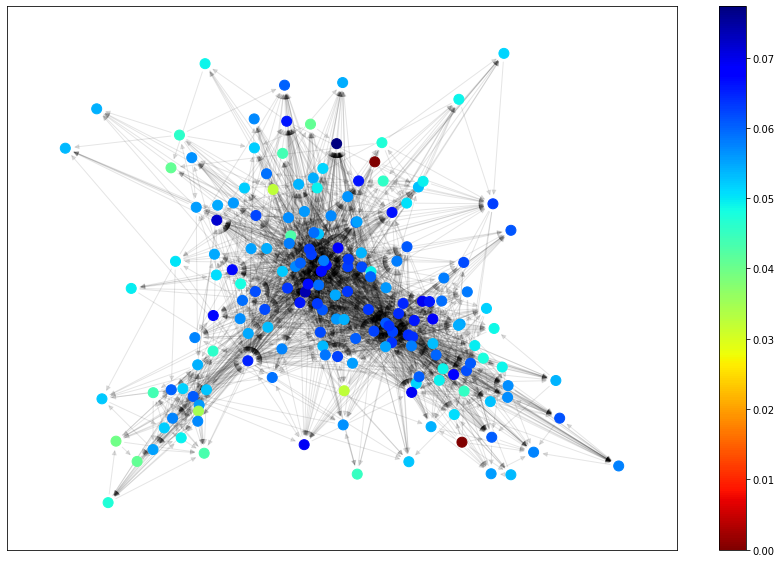

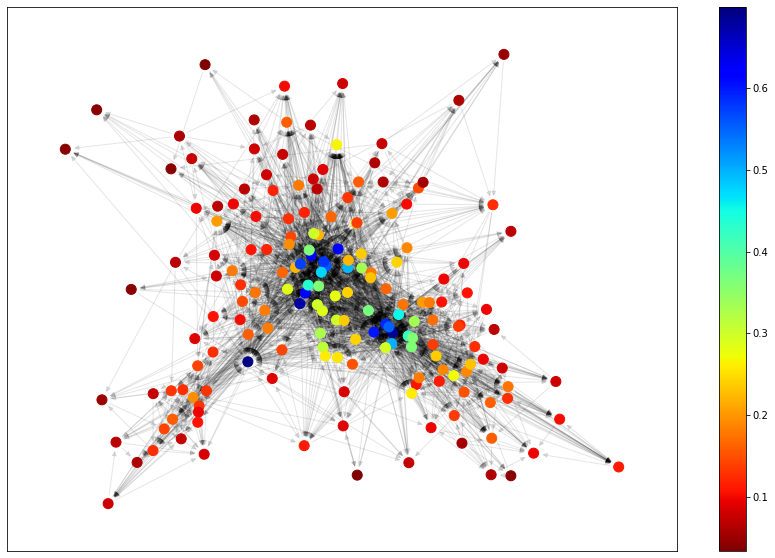

In [ ]:
drawG (G_new_clos)

In [ ]:
G_info(G_new_clos)

Network diameter                 : 3
Network density                  : 0.09530688238315357
Network avr_shortest_p length    : 2.199280945043657
Betweenness Centrality           : 0.789090544870158
Degree Centrality                : 33.245398773006144
Closeness Centrality             : 11.71150289772625


## Degree Centrality

In [ ]:
G_temp = G.copy()
G_new_deg  = higher_than_average(G_temp, 'degree_centrality')
# print( len( G_new_clos.nodes() ) )

222 values that lower than mean is removed


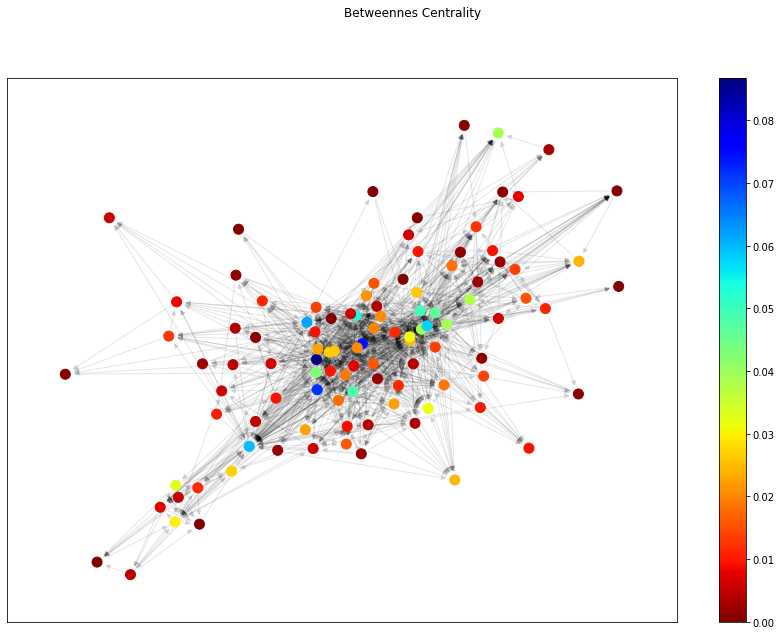

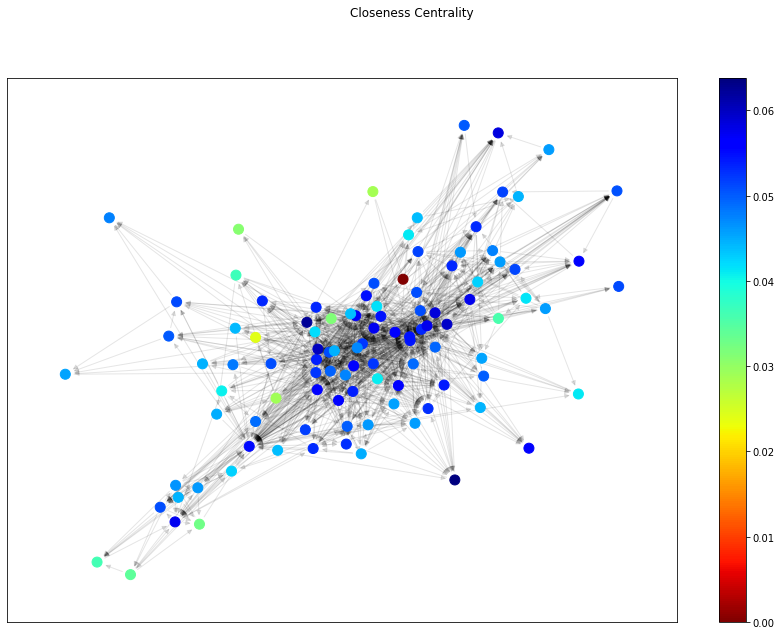

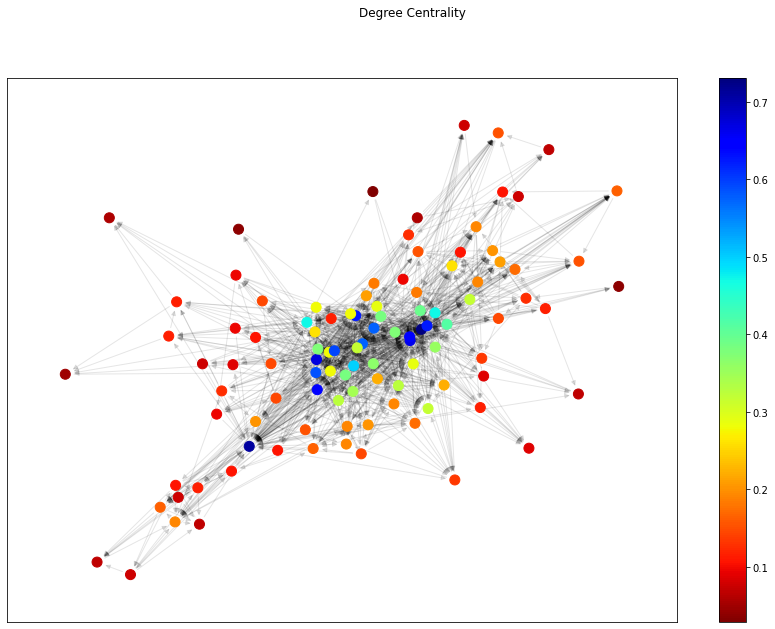

In [ ]:
drawG(G_new_deg)

In [ ]:
G_info(G_new_deg)


Network diameter                 : 3
Network density                  : 0.11913919413919413
Network avr_shortest_p length    : 2.193681318681319
Betweenness Centrality           : 0.520149443131982
Degree Centrality                : 22.15950920245399
Closeness Centrality             : 6.937349230076724


In [ ]:
Complexity = len(G.adj)*len(G.edges())